## Classification (d)

In [1]:
from neuralnet import *
from random import shuffle
import numpy as np
import matplotlib.pyplot as plt

config_d = {}
config_d['layer_specs'] = [3072, 64, 64, 10]
config_d['activation'] = 'tanh'
config_d['learning_rate'] = 0.1
config_d['batch_size'] = 128
config_d['epochs'] = 100  
config_d['early_stop'] = True 
config_d['early_stop_epoch'] = 5
config_d['L2_penalty'] = 0.001
config_d['momentum'] = True  
config_d['momentum_gamma'] = 0.9  
# Create the model

#TODO
#momentum, early stop , expect accuracy around 37%

In [4]:
"""
Train your model here.
Implement batch SGD to train the model.
Implement Early Stopping.
Use config to set parameters for training like learning rate, momentum, etc.
"""
def train_e(model, x_train, y_train, x_valid, y_valid, config, patience=5):
    epochs = config['epochs']
    batch_size = config['batch_size']
    momentum =    config['momentum']
    momentum_gamma = config['momentum_gamma']
    patience = config['early_stop_epoch']

    train_loss_record = []
    train_accuracy_record = []
    holdout_loss_record = []
    holdout_accuracy_record = []

    # How many times the validation loss has gone up in a row.
    cur_loss_up_sequence = 0

    for epoch in range(epochs):
        #model.zero_grad()
        batch_loss = []
        batch_accuracy = []
        for x, y in generate_minibatches(x_train, y_train, batch_size):
            # Forward Pass
            train_y,loss = model.forward(x, y)
            batch_loss.append(loss) 
            # Backward Pass
            model.backward()
            model.updateweight(momentum = True, L2 = True) # update weight for each layer.
            batch_accuracy.append(model.accuracy(x,y))
    
        train_loss = np.mean(np.array(batch_loss))
        train_accuracy = np.mean(np.array(batch_accuracy))
        
        holdout_loss = model.forward(x_valid, y_valid)[1]
        holdout_accuracy = model.accuracy(x_valid, y_valid)

        train_loss_record.append(train_loss)
        train_accuracy_record.append(train_accuracy)

        holdout_loss_record.append(holdout_loss)
        holdout_accuracy_record.append(holdout_accuracy)

        print(f' epoch: {epoch + 1}, train accuracy: {train_accuracy:.4f}, train_loss_norm:{train_loss:.4f}, '\
            f'valid_acc: {holdout_accuracy:.4f}, valid_loss_norm: {holdout_loss:.4f}')   


        # Save the best weights according to test set.
        if holdout_loss > max(holdout_loss_record):
            cur_loss_up_sequence += 1

            if cur_loss_up_sequence >= patience:
                model.save_load_weight(save=False)
                print("earlystop")
                break
        else:
            cur_loss_up_sequence = 0
            # Save the best weights.
            model.save_load_weight(save=True)
    
    return train_loss_record, train_accuracy_record, holdout_loss_record, holdout_accuracy_record

model_d  = Neuralnetwork(config_d)

# Load the data
x_train, y_train, stats = load_data(path="./data",stats = None, mode="train")
x_test, y_test = load_data(path="./data",stats = stats, mode="test")

x_train, y_train, x_valid, y_valid = split_data(x_train,y_train)

train_loss_record, train_accuracy_record, holdout_loss_record, holdout_accuracy_record = train_e(model_d,x_train,y_train,x_valid,y_valid,config_d)

# Recall parameters with minimum validation loss
model_d.save_load_weight(save=False)
test_accuracy = test(model_d, x_test, y_test) 
print(test_accuracy)


(50000, 32, 32, 3)
inp: (50000, 32, 32, 3)
 epoch: 1, train accuracy: 0.2169, train_loss_norm:5.5921, valid_acc: 0.1986, valid_loss_norm: 3.5988
 epoch: 2, train accuracy: 0.1066, train_loss_norm:2.3028, valid_acc: 0.0978, valid_loss_norm: 2.3027
 epoch: 3, train accuracy: 0.1677, train_loss_norm:2.1493, valid_acc: 0.1902, valid_loss_norm: 2.0303
 epoch: 4, train accuracy: 0.2542, train_loss_norm:1.9847, valid_acc: 0.2926, valid_loss_norm: 1.8960
 epoch: 5, train accuracy: 0.3735, train_loss_norm:1.8317, valid_acc: 0.3642, valid_loss_norm: 1.7827
 epoch: 6, train accuracy: 0.4258, train_loss_norm:1.7437, valid_acc: 0.3926, valid_loss_norm: 1.7182
 epoch: 7, train accuracy: 0.4675, train_loss_norm:1.6801, valid_acc: 0.4024, valid_loss_norm: 1.6858
 epoch: 8, train accuracy: 0.5049, train_loss_norm:1.6175, valid_acc: 0.4102, valid_loss_norm: 1.6873
 epoch: 9, train accuracy: 0.5325, train_loss_norm:1.5781, valid_acc: 0.4326, valid_loss_norm: 1.6375
 epoch: 10, train accuracy: 0.5518, tra

 epoch: 81, train accuracy: 0.8183, train_loss_norm:0.9869, valid_acc: 0.4008, valid_loss_norm: 1.9834
 epoch: 82, train accuracy: 0.8194, train_loss_norm:0.9780, valid_acc: 0.4434, valid_loss_norm: 1.8135
 epoch: 83, train accuracy: 0.8215, train_loss_norm:0.9765, valid_acc: 0.4490, valid_loss_norm: 1.7659
 epoch: 84, train accuracy: 0.8220, train_loss_norm:0.9782, valid_acc: 0.4484, valid_loss_norm: 1.7397
 epoch: 85, train accuracy: 0.8219, train_loss_norm:0.9711, valid_acc: 0.4392, valid_loss_norm: 1.7721
 epoch: 86, train accuracy: 0.8223, train_loss_norm:0.9729, valid_acc: 0.4466, valid_loss_norm: 1.7662
 epoch: 87, train accuracy: 0.8220, train_loss_norm:0.9709, valid_acc: 0.4446, valid_loss_norm: 1.7572
 epoch: 88, train accuracy: 0.8230, train_loss_norm:0.9719, valid_acc: 0.4454, valid_loss_norm: 1.8206
 epoch: 89, train accuracy: 0.8264, train_loss_norm:0.9641, valid_acc: 0.4444, valid_loss_norm: 1.7531
 epoch: 90, train accuracy: 0.8281, train_loss_norm:0.9658, valid_acc: 0.

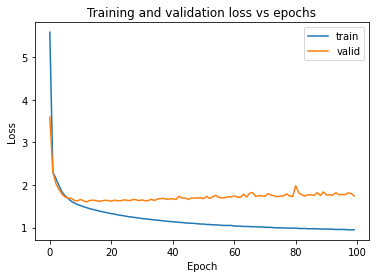

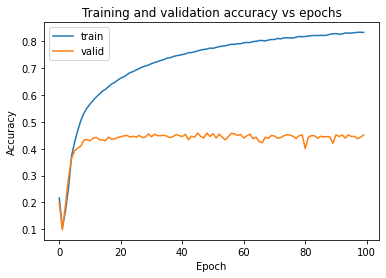

In [6]:
plt.figure(1)
plt.plot(np.arange(config_d['epochs']), train_loss_record, label='train')
plt.plot(np.arange(config_d['epochs']), holdout_loss_record, label='valid')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss vs epochs')
plt.legend()
plt.show()


plt.figure(2)
plt.plot(np.arange(config_d['epochs']), train_accuracy_record, label='train')
plt.plot(np.arange(config_d['epochs']), holdout_accuracy_record, label='valid')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy vs epochs')
plt.legend()
plt.show()